# 机器学习 - 基于scikit-learn、TensorFlow或PyTorch软件包，对Kaggle平台上的乳腺癌数据集进行恶性肿瘤和良性肿瘤的分类，并可视化
- 逻辑回归算法（姚心雨）、随机森林算法（胡晨哲）、支持向量机算法（朱禹阌）、K近邻算法（陈晨）、朴素贝叶斯算法（韩承锦）、决策树算法（许鹏宇）

## 初步分析
题目要求根据良性肿瘤和恶性肿瘤的特征，构建模型来实现二者的分类。 在这个项目中，我们需要做的几件事情是：

- [1.收集数据](#1)
- [2.分析数据](#2)
- [3.对数据进行预处理](#3)
- [4.选择并训练模型 ](#4)
- [5.评估模型](#5)
- [6.模型改进](#6)
- [7.模型分类准确率对比](#7)

## 目录
- [ 1 - 导入需要的库](#1)
- [ 2 - 导入csv文件](#2)
- [ 3 - 对数据进行处理](#3)
- [ 4 - 划分训练集与测试集](#4)
- [ 5 - 用到的各种算法及训练相关的模型](#5)
    - [ 5.1 逻辑回归算法](#5.1)
    - [ 5.2 随机森林算法](#5.2)
    - [ 5.3 支持向量机算法](#5.3)
    - [ 5.4 K近邻算法](#5.4)
    - [ 5.5 朴素贝叶斯算法](#5.5)
    - [ 5.6 决策树算法](#5.6)
- [ 6 - 预测评估模型及结果的可视化](#6)
    - [ 6.1 逻辑回归算法](#6.1)
        - [ 6.1.1 预测评估模型](#6.1.1)
        - [ 6.1.2 PCA可视化](#6.1.2)
        - [ 6.1.3 混淆矩阵可视化](#6.1.3)
    - [ 6.2 随机森林算法](#6.2)
        - [ 6.2.1 预测评估模型](#6.2.1)
        - [ 6.2.2 混淆矩阵可视化](#6.2.2)
    - [ 6.3 支持向量机算法](#6.3)
        - [ 6.3.1 预测评估模型](#6.3.1)
        - [ 6.3.2 PCA可视化](#6.3.2)
        - [ 6.3.3 混淆矩阵可视化](#6.3.3)
    - [ 6.4 K近邻算法](#6.4)
        - [ 6.4.1 预测评估模型](#6.4.1)
        - [ 6.4.2 混淆矩阵可视化](#6.4.2)
        - [ 6.4.3 使用交叉验证改进模型](#6.4.3)
    - [ 6.5 朴素贝叶斯算法](#6.5)
        - [ 6.5.1 预测评估模型](#6.5.1)
        - [ 6.5.2 混淆矩阵可视化](#6.5.2)
        - [ 6.5.3 模型改进](#6.5.3)
    - [ 6.6 决策树算法](#6.6)
        - [ 6.6.1 预测评估模型](#6.6.1)
        - [ 6.6.2 决策树可视化](#6.6.2)
- [ 7 - 6种算法的分类效果对比(ROC图)](#7)

<a name="1"></a>
### 1 - 导入需要的库

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import graphviz
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font",family='YouYuan')
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn import utils
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from collections import Counter
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


<a name="2"></a>
### 2 - 导入csv文件

In [3]:
csv = pd.read_csv(r"D:\Data\data.csv")

In [4]:
#显示csv文件的前几行，检查是否导入成功
csv.drop(columns = 'Unnamed: 32',inplace=True)
csv.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a name="3"></a>
### 3 - 对数据进行预处理 

In [5]:
#由于id对分类没有任何帮助，反而会影响模型的准确度，故在此提前删去
csv=csv.drop(['id'],axis=1)

#X为从第0行到第569行，从"radius_mean"列到"fractal_dimension_worst"列的所有数据
X = csv.loc[0:569,"radius_mean":"fractal_dimension_worst"]

#y为需要预测的变量，即第0列的"diagnosis"
y = csv.iloc[:, 0]

#检查X,y数据中是否包含缺失值
print(X.isnull().sum())
print(y.isnull().sum())

# 如果有缺失值，则说明这一行数据在一定程度上是不可靠的，故删除
X.dropna(inplace=True)
y.dropna(inplace=True)

# 确保特征列是数值类型
X = X.astype('float')

# 将标签列转换为数值
csv['diagnosis'] = csv['diagnosis'].map({'M': 1, 'B': 0})
y_numeric = y.map({'B': 0, 'M': 1})

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 PCA 降维以便可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
0


In [6]:
#检查X，y是否匹配
print(X.shape)
print(y.shape)

(569, 30)
(569,)


<a name="4"></a>
### 4 - 划分训练集与测试集

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#检查是否划分正确
print(len(X_train), "train +", len(X_test), "test")

455 train + 114 test


<a name="5"></a>
### 5 - 用到的各种算法及训练相关的模型 

#### 5.1 - 逻辑回归算法

In [9]:
# 创建逻辑回归模型
lr = LogisticRegression(solver='sag', max_iter=1000,tol=1e-3)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

#### 5.2 随机森林算法

In [10]:
# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 5.3 支持向量机算法

In [11]:
# 创建支持向量机模型
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

#### 5.4 K近邻算法（KNN）

In [12]:
# 创建KNN模型
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 5.5 朴素贝叶斯算法

In [13]:
# 实现朴素贝叶斯算法
class GaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)

        # 每个类别的先验概率，使用 Counter 计算
        class_counts = Counter(y)
        self.class_priors = np.array([count / len(X) for count in class_counts.values()])

        # 每个类别都有个数组储存每个特征的均值和方差
        self.means = {class_name: np.mean(class_X, axis=0) for class_name, class_X in self._iter_class_X(X, y)}
        self.variances = {class_name: np.var(class_X, axis=0, ddof=1) for class_name, class_X in self._iter_class_X(X, y)}

    def _iter_class_X(self, X, y):
        for class_name in self.classes:
            class_indices = y == class_name
            yield class_name, X[class_indices]

    def predict(self, X):
        posteriors = []
        for class_name in self.classes:
            prior = self.class_priors[self.classes == class_name]
            mean = self.means[class_name]
            variance = self.variances[class_name]

            # 计算每个特征的对数似然和
            log_likelihood = norm.logpdf(X, mean, np.sqrt(variance))
            log_prior = np.log(prior)

            # 计算后验概率
            log_posterior = log_likelihood.sum(axis=1) + log_prior

            # 将每个类别的对数后验概率存储起来
            posteriors.append(log_posterior)

        # 选择具有最高后验概率的类别作为预测结果
        y_pred = self.classes[np.argmax(posteriors, axis=0)]
        return y_pred
bys_classifier = GaussianNB()

#利用训练集训练模型
bys_classifier.fit(X_train, y_train)

#### 5.6 决策树算法

In [14]:
# 实例化决策树，香农熵，训练集训练
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=3, max_depth=15)
# clf为拟合好的模型
clf = dtc.fit(X_train, y_train)

<a name="6"></a>
### 6 - 预测评估模型及结果的可视化

#### 6.1 - 逻辑回归算法

6.1.1 预测与评估模型

In [15]:
# 创建函数来评估模型
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    return accuracy, confusion, report

# 预测测试集
predictions = lr.predict(X_test)
y_pred_alg1 = predictions
# 打印分类报告
accuracy, confusion, report = evaluate_model(y_test, predictions)
print("\n混淆矩阵:")
print(confusion)
print("\n分析结果:")
print(report)
print("准确率:", accuracy)


混淆矩阵:
[[66  1]
 [ 7 40]]

分析结果:
              precision    recall  f1-score   support

           B       0.90      0.99      0.94        67
           M       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

准确率: 0.9298245614035088


6.1.2 PCA可视化

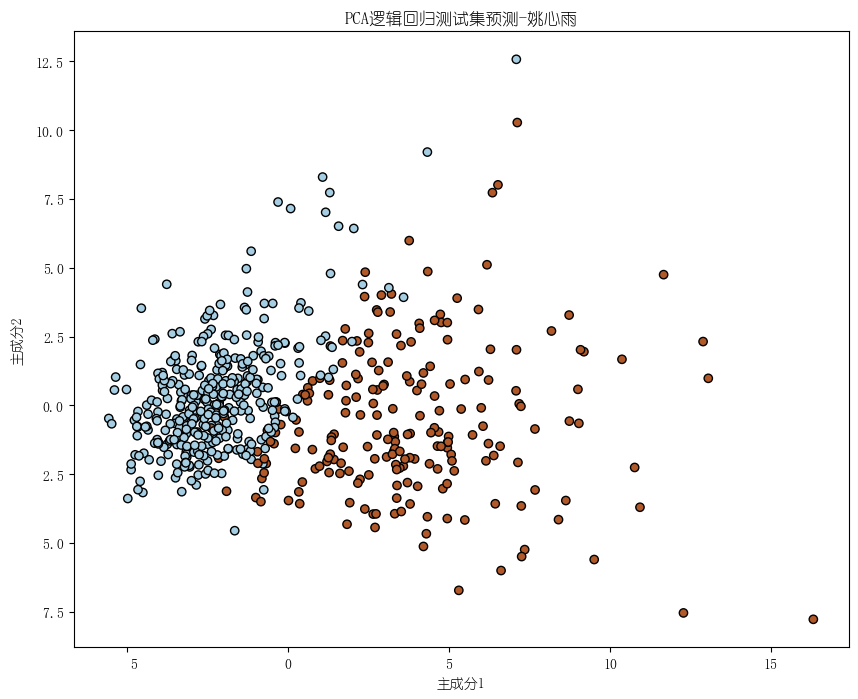

In [16]:
# 忽略来自 IPython 的 UserWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# PCA可视化
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=csv['diagnosis'], cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('PCA逻辑回归测试集预测-姚心雨')
plt.show()

6.1.3 混淆矩阵可视化

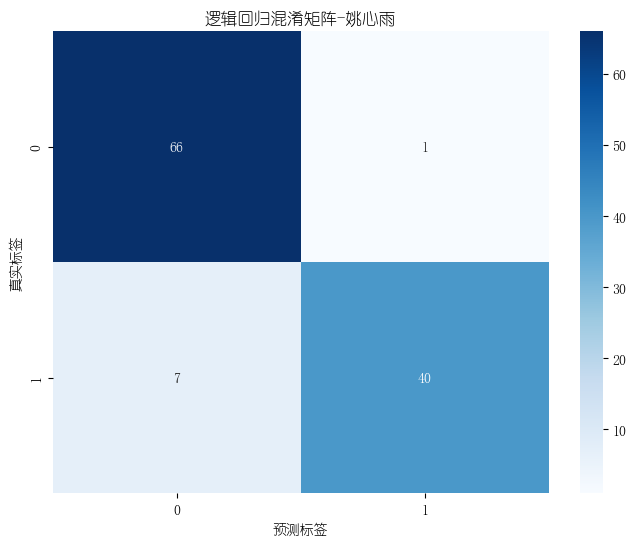

In [17]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, predictions)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('逻辑回归混淆矩阵-姚心雨')
plt.show()

#### 6.2 - 随机森林算法

6.2.1 预测与评估模型

In [18]:
y_pred = rf.predict(X_test)
y_pred_alg2=y_pred
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 打印分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[65  2]
 [ 1 46]]

Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.97      0.98        67
           M       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy Score:
0.9736842105263158


6.2.2 混淆矩阵可视化

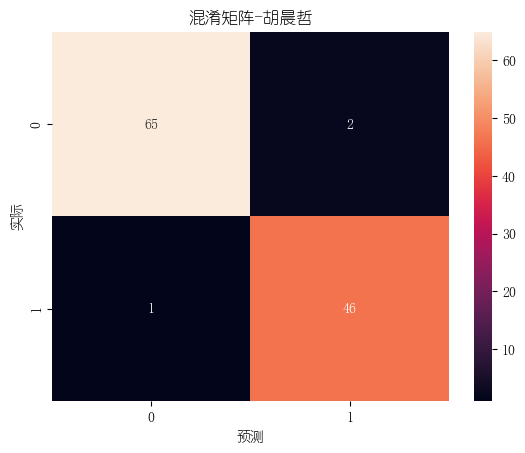

In [19]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('混淆矩阵-胡晨哲')
plt.xlabel('预测')
plt.ylabel('实际')
plt.show()

# 计算混淆矩阵
cm = confusion_matrix(y_test, predictions)

#### 6.3 - 支持向量机算法

6.3.1 预测与评估模型

In [20]:
# 预测
y_pred = svc.predict(X_test)
y_pred_alg3=y_pred
# 模型评估
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[63  4]
 [ 1 46]]

Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.94      0.96        67
           M       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Accuracy Score:
0.956140350877193


6.3.2 PCA可视化

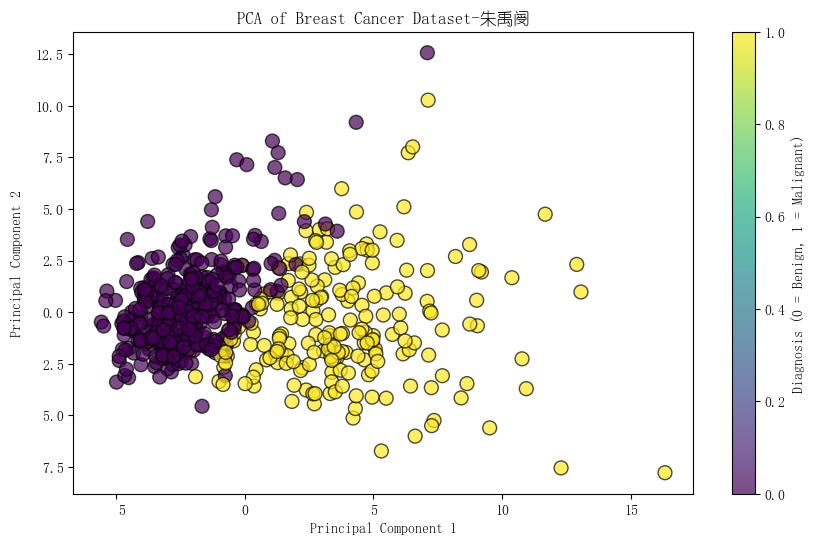

In [21]:
# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=csv['diagnosis'], cmap='viridis', edgecolors='k', s=100, alpha=0.7)
plt.title('PCA of Breast Cancer Dataset-朱禹阌')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()

6.3.3 混淆矩阵可视化

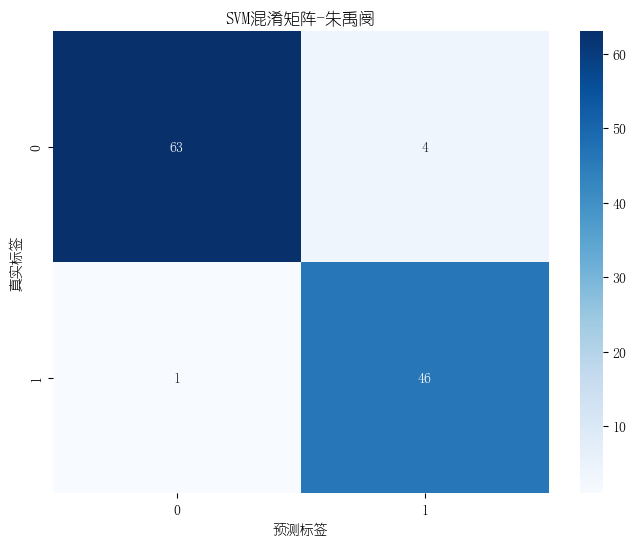

In [22]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('SVM混淆矩阵-朱禹阌')
plt.show()

#### 6.4 -K近邻算法

6.4.1 预测与评估模型

In [23]:
y_pred = knn.predict(X_test)
y_pred_alg4=y_pred
print(f"y_pred={y_pred}")
accuracy = accuracy_score(y_test, y_pred)
print(f'精确度: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

y_pred=['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'B']
精确度: 0.939
              precision    recall  f1-score   support

           B       0.95      0.94      0.95        67
           M       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



6.4.2 混淆矩阵可视化

[[63  4]
 [ 3 44]]


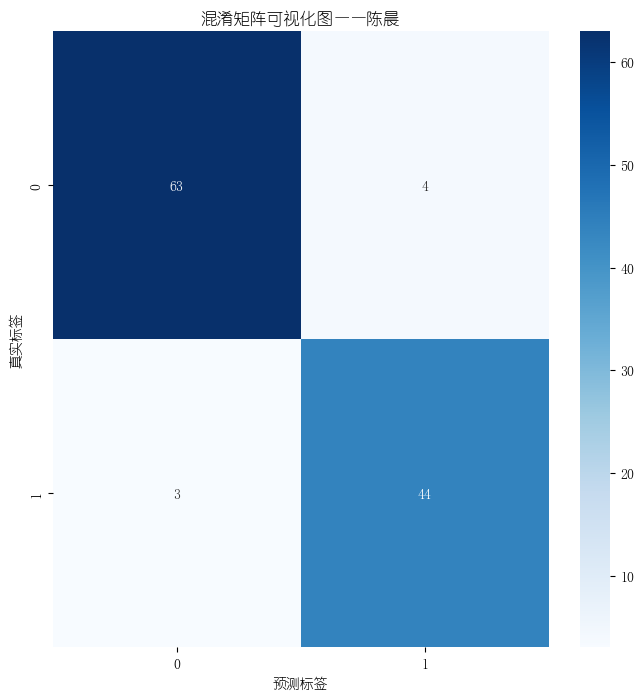

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
# 设置matplotlib参数以支持中文显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.figure(figsize=(8, 8))
plt.title('混淆矩阵可视化图——陈晨')
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()

6.4.3 使用交叉验证改进模型

In [25]:
# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 设置k值范围
k_range = list(range(1, 31))
# 设置网格搜索参数
param_grid = dict(n_neighbors=k_range)

# 创建网格搜索对象
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# 拟合网格搜索对象
grid.fit(X_train_scaled, y_train)

# 输出最佳k值
best_k = grid.best_params_['n_neighbors']
print(f"Best k: {best_k}")

Best k: 4


#### 6.5 -朴素贝叶斯算法

6.5.1 预测与评估模型

In [26]:
# 使用训练好的模型对测试集进行预测
y_pred = bys_classifier.predict(X_test)
y_pred_alg5=y_pred
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9035087719298246


6.5.2 混淆矩阵可视化

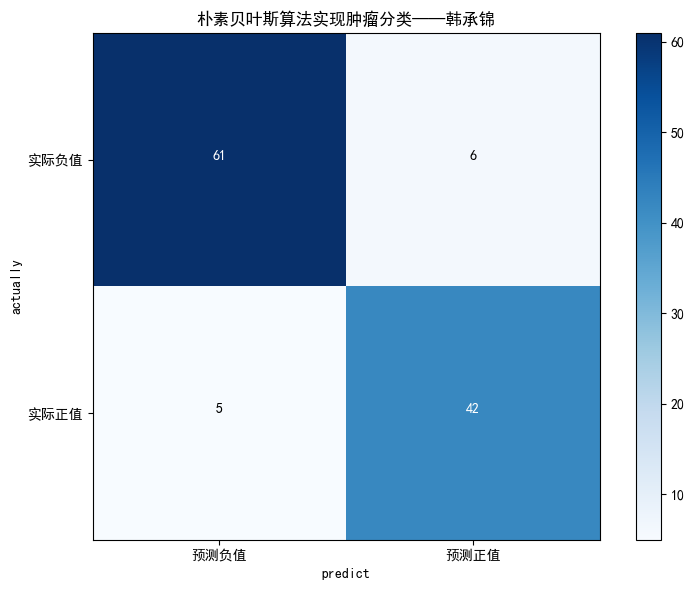

In [27]:
# 将黑体设置为Matplotlib的默认字体，以此来显示中文
plt.rcParams['font.family'] = 'SimHei'

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# 设置 x 轴和 y 轴的标签
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['预测负值', '预测正值'])
plt.yticks(tick_marks, ['实际负值', '实际正值'])

# 显示数值标签
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

# 显示图表的标题和坐标轴标签
plt.title('朴素贝叶斯算法实现肿瘤分类——韩承锦')
plt.xlabel('predict')
plt.ylabel('actually')

# 显示颜色条
plt.colorbar()

# 显示图表
plt.tight_layout()
plt.show()

6.5.3 模型改进

In [28]:
# 使用交叉验证集更好的评估
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
bys_classifier = GaussianNB()

# 使用 KFold 进行交叉验证，将数据集分成 5 个子集
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 使用 cross_val_score 进行交叉验证
scores = cross_val_score(bys_classifier, X, y, cv=kf, scoring='accuracy')

print("Accuracy for each fold: ", scores)
print("Average accuracy: ", np.mean(scores))

Accuracy for each fold:  [0.97368421 0.92105263 0.94736842 0.92982456 0.92035398]
Average accuracy:  0.9384567613724576


#### 6.6 -决策树算法

6.6.1 预测和评估模型

In [29]:
predict_Y = dtc.predict(X=X_test)
y_pred_alg6=predict_Y
print(f"predict_Y={predict_Y}")

predict_Y=['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'M' 'M']


6.6.2 决策树可视化

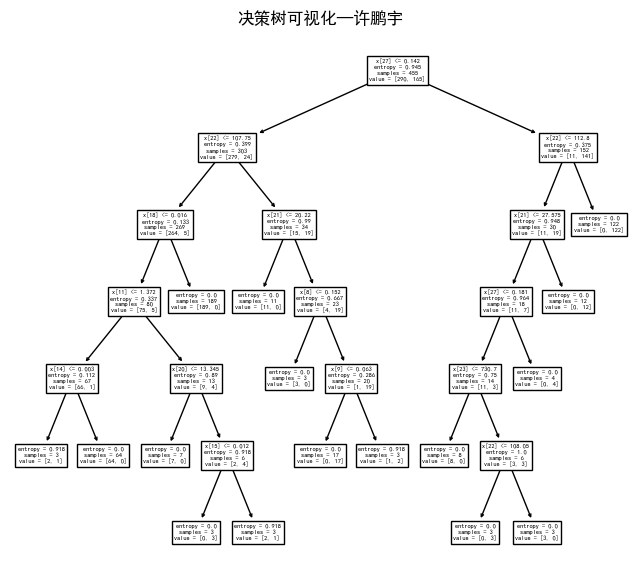

In [30]:
from sklearn import tree
from  sklearn.tree import DecisionTreeClassifier,plot_tree
from  sklearn.datasets import load_iris
dot_data = tree.export_graphviz( dtc , out_file = None )
graph = graphviz.Source(dot_data)
graph.render("DecisionTree")
# 设置matplotlib参数以支持中文显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.figure(figsize=(8,7))
plot_tree(dtc)
plt. title('决策树可视化—许鹏宇')
plt.show()

In [31]:
print(f"y_test={y_test}")

y_test=512    M
457    B
439    B
298    B
37     B
      ..
213    M
519    B
432    M
516    M
500    B
Name: diagnosis, Length: 114, dtype: object


<a name="7"></a>
### 7 - 6种算法的分类效果对比(ROC图)

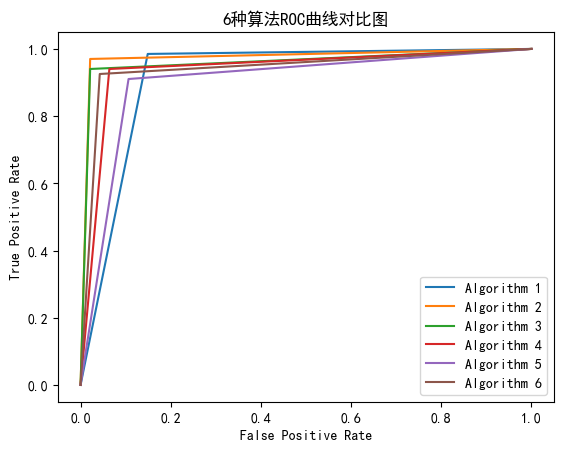

In [32]:
from sklearn.metrics import roc_curve, auc
# 将'B'编码为0，'M'编码为1
y_test = np.where(y_test=='M', 0, 1)
y_pred_alg1=np.where(y_pred_alg1=='M', 0, 1)
y_pred_alg2=np.where(y_pred_alg2=='M', 0, 1)
y_pred_alg3=np.where(y_pred_alg3=='M', 0, 1)
y_pred_alg4=np.where(y_pred_alg4=='M', 0, 1)
y_pred_alg5=np.where(y_pred_alg5=='M', 0, 1)
y_pred_alg6=np.where(y_pred_alg6=='M', 0, 1)

# 计算TPR和FPR
fpr_alg1, tpr_alg1, _ = roc_curve(y_test, y_pred_alg1)
fpr_alg2, tpr_alg2, _ = roc_curve(y_test, y_pred_alg2)
fpr_alg3, tpr_alg3, _ = roc_curve(y_test, y_pred_alg3)
fpr_alg4, tpr_alg4, _ = roc_curve(y_test, y_pred_alg4)
fpr_alg5, tpr_alg5, _ = roc_curve(y_test, y_pred_alg5)
fpr_alg6, tpr_alg6, _ = roc_curve(y_test, y_pred_alg6)

# 绘制ROC曲线
plt.plot(fpr_alg1, tpr_alg1, label='Algorithm 1')
plt.plot(fpr_alg2, tpr_alg2, label='Algorithm 2')
plt.plot(fpr_alg3, tpr_alg3, label='Algorithm 3')
plt.plot(fpr_alg4, tpr_alg4, label='Algorithm 4')
plt.plot(fpr_alg5, tpr_alg5, label='Algorithm 5')
plt.plot(fpr_alg6, tpr_alg6, label='Algorithm 6')

# 添加图例和标题
plt.legend()
# 设置matplotlib参数以支持中文显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.title('6种算法ROC曲线对比图')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()